No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'W(S)')

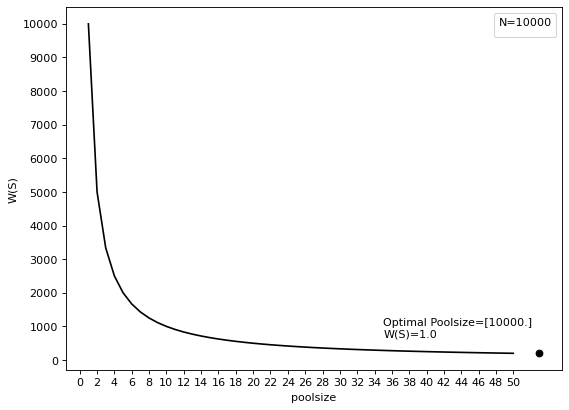

In [1]:
import math
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pyplot import cm
from itertools import cycle

N = 10000
percent = 20
prevalence = (percent * N) /100.0
p = prevalence/N

def expected_write_transactions(k,p):
    number_of_pools = N/k
    return number_of_pools
plt.figure(figsize=(8, 6), dpi=80)
x = np.linspace(1,50,50).astype(float)
y = expected_write_transactions(x,p)

x_n = np.linspace(1,N,N).astype(float)
y_n = expected_write_transactions(x_n,p)

opt_idx_plot = np.where(y==np.amin(y))
plt.plot(x,y,"black")

plt.scatter(x[opt_idx_plot]+3,y[opt_idx_plot],c="black")
plt.text(35,y[opt_idx_plot]+500,"Optimal Poolsize={}\nW(S)={}".format(x_n[np.where(y_n==np.amin(y_n))],np.amin(y_n)))
plt.legend(title="N=10000")
plt.xlabel("poolsize")
plt.xticks(np.arange(0, max(x)+1, 2.0))
plt.yticks(np.arange(0, N + 1000, 1000))
plt.ylabel("W(S)")

C:\Users\User\AppData\Local\Temp/ipykernel_18744/911762256.py:32: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x,y,next(linecycler),c="black",linestyle=linestyle)
C:\Users\User\AppData\Local\Temp/ipykernel_18744/911762256.py:32: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(x,y,next(linecycler),c="black",linestyle=linestyle)
C:\Users\User\AppData\Local\Temp/ipykernel_18744/911762256.py:32: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-." (-> linestyle='-.'). The keyword argument will take precedence.
  plt.plot(x,y,next(linecycler),c="black",linestyle=linestyle)
C:\Users\User\AppData\Local\Temp/ipykernel_18744/911762256.py:32: UserWarning: linestyle is redundantly d

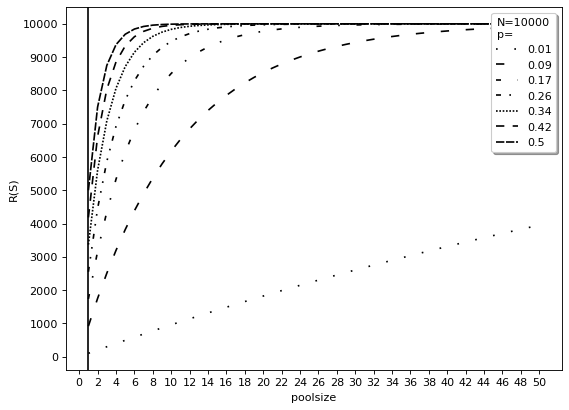

In [2]:
def expected_scrubbing(N,k,p):
    number_of_pools = N/k
    number_of_positive_pools = (1 - np.power((1-p),k))* number_of_pools
    return number_of_positive_pools*k


lines = ["-","--","-.",":"]
linestyle_tuple = [
     ('loosely dotted',        (0, (1, 10))),
     ('loosely dashed',        (0, (5, 10))),
     ('loosely dashdotted',    (0, (3, 10, 1, 10))),
     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('dotted',                (0, (1, 1))),

     ('dashed',                (0, (5, 5))),
     ('densely dashed',        (0, (5, 1))),

     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]
linecycler = cycle(lines)

n = 7
p_arr = np.linspace(0.01,0.5,n)
color = cm.rainbow(np.linspace(0, 1, n))
plt.figure(figsize=(8, 6), dpi=80)
for p,(name,linestyle) in zip(p_arr,linestyle_tuple):
    x = np.linspace(1,50,50).astype(float)
    y = expected_scrubbing(N,x,p)
    plt.plot(x,y,next(linecycler),c="black",linestyle=linestyle)
    plt.legend(np.round(p_arr,2), loc='upper right', fancybox=True, shadow=True,title="N=10000\np=")
plt.xlabel("poolsize")
plt.ylabel("R(S)")
plt.axvline(x=1,c="black")
plt.xticks(np.arange(0, max(x)+1, 2.0))
plt.yticks(np.arange(0, N + 1000, 1000))
plt.show()

C:\Users\User\AppData\Local\Temp/ipykernel_18744/1229071796.py:22: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x,y,next(linecycler),c="black",linestyle=linestyle)
C:\Users\User\AppData\Local\Temp/ipykernel_18744/1229071796.py:22: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(x,y,next(linecycler),c="black",linestyle=linestyle)
C:\Users\User\AppData\Local\Temp/ipykernel_18744/1229071796.py:22: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-." (-> linestyle='-.'). The keyword argument will take precedence.
  plt.plot(x,y,next(linecycler),c="black",linestyle=linestyle)
C:\Users\User\AppData\Local\Temp/ipykernel_18744/1229071796.py:22: UserWarning: linestyle is redundant

optimal poolsize=[10000.]
[1.]


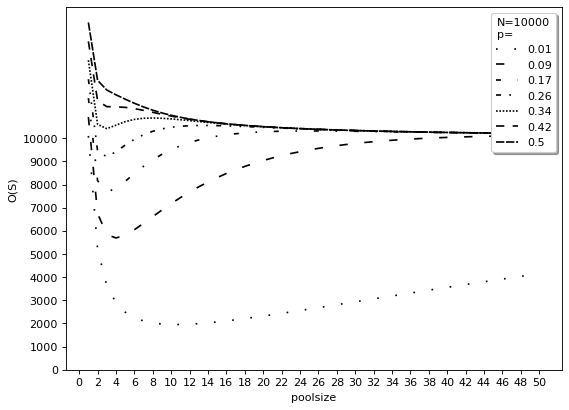

In [3]:
def expected_operations(N,k,p):
    number_of_pools = N/k
    number_of_positive_pools = (1 - np.power((1-p),k)) * number_of_pools
    return number_of_pools + number_of_positive_pools*k

opt_idx = np.where(y_n==np.amin(y_n))
print("optimal poolsize={}".format(x_n[opt_idx]))
opt_k = y_n[opt_idx]
print(opt_k)

lines = ["-","--","-.",":"]
linecycler = cycle(lines)

n = 7
p_arr = np.linspace(0.01,0.5,n)
color = cm.rainbow(np.linspace(0, 1, n))
plt.figure(figsize=(8, 6), dpi=80)

for p,(name,linestyle) in zip(p_arr,linestyle_tuple):
    x = np.linspace(1,50,50).astype(float)
    y = expected_operations(N,x,p)
    plt.plot(x,y,next(linecycler),c="black",linestyle=linestyle)
    plt.legend(np.round(p_arr,2), loc='upper right', fancybox=True, shadow=True,title="N=10000\np=")
plt.xlabel("poolsize")
plt.ylabel("O(S)")
plt.xticks(np.arange(0, max(x)+1, 2.0))
plt.yticks(np.arange(0, N + 1000, 1000))
plt.show()

[]

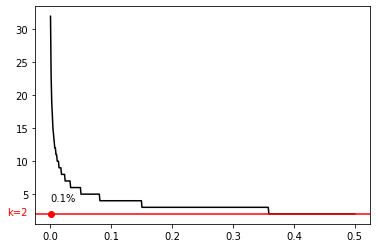

In [4]:

x = np.linspace(1,500,500)
y = np.ceil(1.24 * np.power(x/1000,-0.466))
plt.plot(x/1000,y,color="black")
plt.plot(x[np.argmax(y<2.00)]/1000,2.00,"ro")
plt.text(x[np.argmax(y<2.00)]/1000,4.00,"{}%".format(x[np.argmax(y<2.00)]/1000*100))
plt.text(-0.07,1.8,"k=2",color="r")
plt.axhline(y=2,color="r")
plt.plot()

In [5]:
def expected_operations(N,k,p):
    number_of_pools = N/k
    number_of_positive_pools = (1 - np.power((1-p),k)) * number_of_pools
    return number_of_pools + number_of_positive_pools*k

def expected_write_transactions(N,k):
    number_of_pools = N/k
    return number_of_pools

def optimal_pool_size(N,p):
    if(p<=0.0):
        return N
    return np.ceil(1.24*np.power(p,-0.466))
# poc_ropsten.ipynb
df = pd.DataFrame({"N":10000,"p":np.linspace(0.01,0.4,10)})
df["k"] = df.apply(lambda row: optimal_pool_size(row.N,row.p),axis=1)
df["O(S_i)"] = df.apply(lambda row: expected_operations(row.N,1,row.p),axis=1)
df["O(S_h)"] = df.apply(lambda row: expected_operations(row.N,row.k,row.p),axis=1)
df["W(S_i)"] = df.apply(lambda row: expected_write_transactions(row.N,1),axis=1)
df["W(S_h)"] = df.apply(lambda row: expected_write_transactions(row.N,row.k),axis=1)
df["E(S_h)"] = df.apply(lambda row: row["O(S_i)"]/row["O(S_h)"],axis=1)
df["C(S_h)"] = df.apply(lambda row: row["W(S_i)"]/row["W(S_h)"],axis=1)


In [6]:
df[:10]

,N,p,k,O(S_i),O(S_h),W(S_i),W(S_h),E(S_h),C(S_h)
0,10000,0.010000,11.0,10100.000000,1955.708367,10000.0,909.090909,5.164369,11.0
1,10000,0.053333,5.0,10533.333333,4396.992365,10000.0,2000.000000,2.395577,5.0
2,10000,0.096667,4.0,10966.666667,5841.258665,10000.0,2500.000000,1.877449,4.0
3,10000,0.140000,4.0,11400.000000,7029.918400,10000.0,2500.000000,1.621640,4.0
4,10000,0.183333,3.0,11833.333333,7886.620370,10000.0,3333.333333,1.500431,3.0
5,10000,0.226667,3.0,12266.666667,8708.456296,10000.0,3333.333333,1.408593,3.0
6,10000,0.270000,3.0,12700.000000,9443.163333,10000.0,3333.333333,1.344888,3.0
7,10000,0.313333,3.0,13133.333333,10095.623704,10000.0,3333.333333,1.300894,3.0
8,10000,0.356667,3.0,13566.666667,10670.719630,10000.0,3333.333333,1.271392,3.0
9,10000,0.400000,2.0,14000.000000,11400.000000,10000.0,5000.000000,1.228070,2.0
